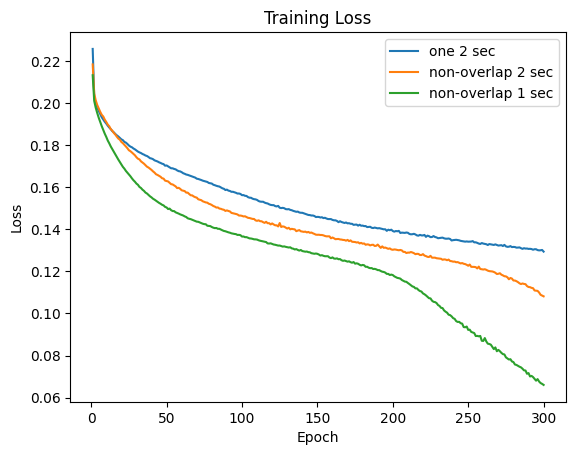

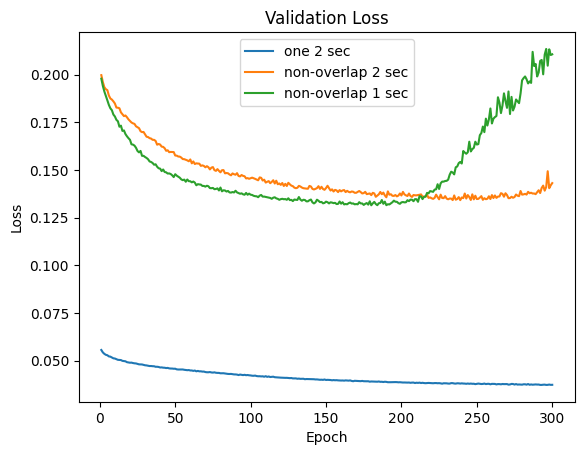

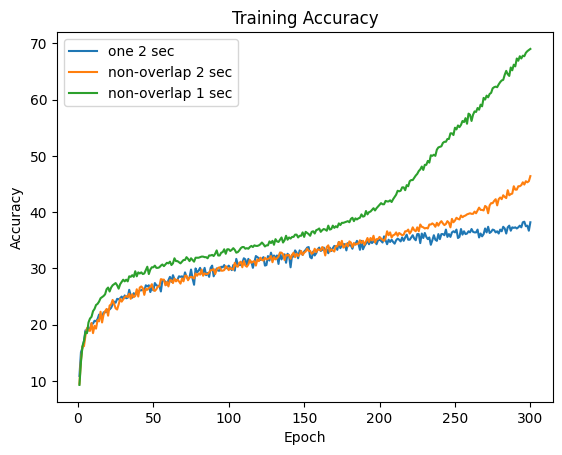

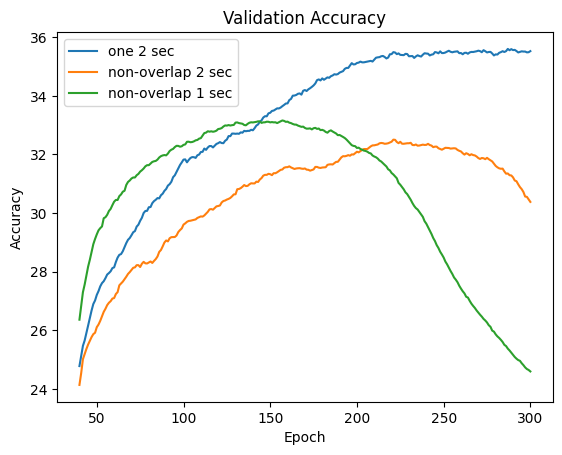

In [1]:
## COMPARE DATASETS

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


filenames = ['saveResults/results_epochs=5000_eps=8_batch_size=64_lr=1e-4.txt','saveResults/results_epochs=4997_seconds_of_history_used=2.0_non_overlapping_sequences_per_instance.txt','saveResults/results_epochs=4997_seconds_of_history_used=1.0_non_overlapping_sequences_per_instance.txt']
num_files = len(filenames)
num_epochs = 300
lenOfOnePerSeq = 2186

# Create empty arrays to store the data
epochs = np.zeros((num_files, num_epochs))
train_loss = np.zeros((num_files, num_epochs))
val_loss = np.zeros((num_files, num_epochs))
train_acc = np.zeros((num_files, num_epochs))
val_acc = np.zeros((num_files, num_epochs))


# Loop over the text files
for i, filename in enumerate(filenames):
    with open(filename, 'r') as f:
        for j, line in enumerate(f):
            if j == num_epochs:
                break
            if line.startswith('Epoch'):
                parts = line.split(': ')
                epoch = int(parts[0].split('[')[1].split('/')[0])
                epochs[i][j] = epoch
                train_loss[i][j] = float(parts[2].split(' |')[0])
                val_loss[i][j] = float(parts[3].split(' |')[0])
                train_acc[i][j] = float(parts[4].split(' %')[0])
                val_acc[i][j] = float(parts[5].split(' %')[0])
            if i == 0:
                train_loss[i][j] = train_loss[i][j]/lenOfOnePerSeq
                val_loss[i][j] = val_loss[i][j]/lenOfOnePerSeq
                

# Plot the data
plt.figure()
# plt.subplot(1, 2, 1)
for i in range(num_files):
    plt.plot(epochs[i], train_loss[i], label=f'File {i+1}')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['one 2 sec', 'non-overlap 2 sec', 'non-overlap 1 sec'])
plt.show()

# plt.subplot(1, 2, 2)
for i in range(num_files):
    plt.plot(epochs[i], val_loss[i], label=f'File {i+1}')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['one 2 sec', 'non-overlap 2 sec', 'non-overlap 1 sec'])
plt.show()

plt.figure()
# plt.subplot(1, 2, 1)
for i in range(num_files):
    plt.plot(epochs[i], train_acc[i], label=f'File {i+1}')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['one 2 sec', 'non-overlap 2 sec', 'non-overlap 1 sec'])
plt.show()


# print(f"val_acc={val_acc[0]}")
# print(f"df={df}")
# print(f"smoothed={smoothed}")
# print(f"smoothed_list={smoothed_list}")
# print(f"numpy_smoothed_list.shape={numpy_smoothed_list.shape}")
# print(f"squeezed_numpy_smoothed_list.shape={squeezed_numpy_smoothed_list.shape}")
# print(f"epochs[0].shape={epochs[0].shape}")


# plt.subplot(1, 2, 2)
for i in range(num_files):
    # Convert the list to a pandas DataFrame
    df = pd.DataFrame(val_acc[i])
    # Apply a rolling window of size 20 and take the mean of each window
    smoothed = df.rolling(40).mean()
    # Convert the smoothed DataFrame back to a list
    smoothed_list = smoothed.values.tolist()
    numpy_smoothed_list = np.array(smoothed_list)
    squeezed_numpy_smoothed_list = np.squeeze(numpy_smoothed_list, 1)

    plt.plot(epochs[i], squeezed_numpy_smoothed_list, label=f'File {i+1}')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['one 2 sec', 'non-overlap 2 sec', 'non-overlap 1 sec'])
plt.show()


